
# Frontmatter
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/) is a link to the source code for this perceptron blog post.

# Intro under Construction.
In this blog post I am going to discuss kernel logistic regression for binary classification. 




# Implementation 
# Under Construction.

In [1]:

%load_ext autoreload
%autoreload 2

First, let's import some libraries.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
        print(w)
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

[0.77815984 0.49801173]


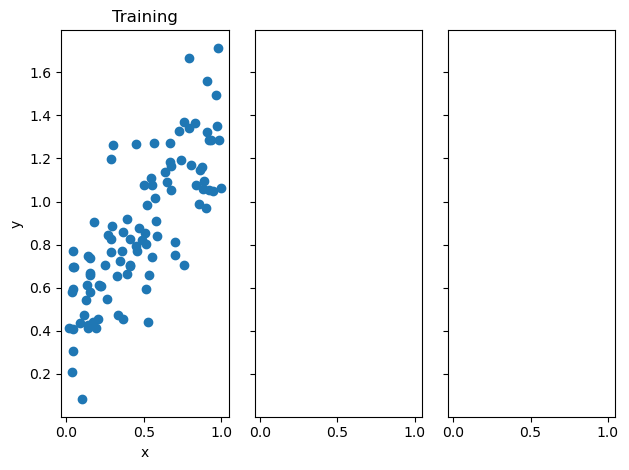

In [3]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 3, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
# axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
# labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

Here's some math equations that makes all this work:

### $$ \hat{w} = \arg \min_{w} L(w) $$

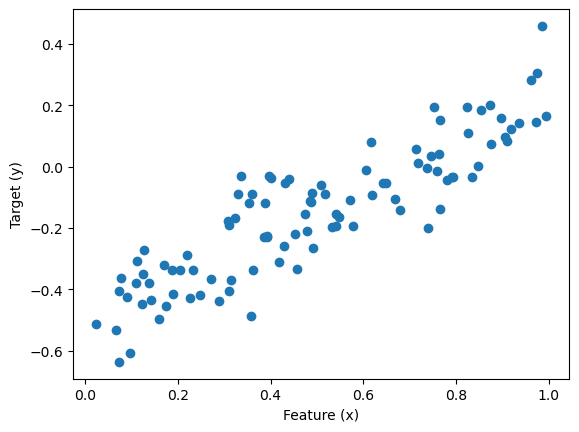

In [4]:

w0 = -0.5
w1 =  0.7

n = 100
x = np.random.rand(n, 1)
y = w1*x + w0 + 0.1*np.random.randn(n, 1)

plt.scatter(x, y)
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")

In [5]:
# from sklearn.metrics.pairwise import rbf_kernel
from linear_regression import LinearRegression 
LR = LinearRegression()
# LR.fit_analytic(X_train, y_train) # I used the analytical formula as my default fit method
# print(f"Training score = {LR.score(X_train, y_train).round(4)}")
# print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

In [6]:
from linear_regression import LinearRegression 
LR = LinearRegression()
X_ = LR.pad(x)
LR.fit_gradient(X_,y)

In [7]:
# print(LR.score_history)
# print(LR.history)

[[ 0.5894377 ]
 [-0.43822669]]
None


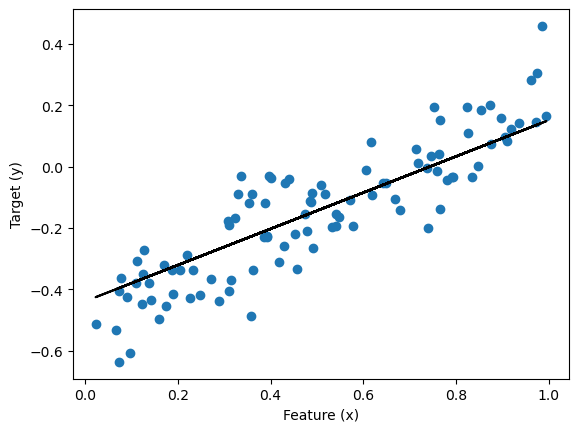

In [8]:
plt.scatter(x, y)
plt.plot(x, X_@LR.w, color = "black")
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")
# labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")
print(LR.w)
print(LR.w_analytic)

# under construction fit analytic

[[ 0.5894377 ]
 [-0.43822669]]
[[ 0.70825227]
 [-0.50084172]]


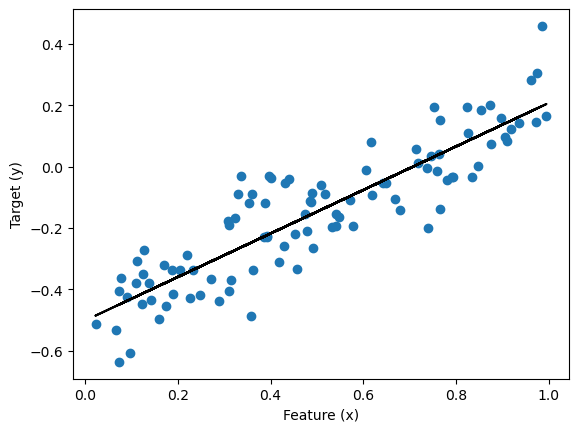

In [10]:
X_ = LR.pad(x)
LR.fit_analytic(X_,y)
plt.scatter(x, y)
plt.plot(x, X_@LR.w_analytic, color = "black")
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")
# labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")
print(LR.w)
print(LR.w_analytic)